# Exercício 04
## Seleção de variáveis
### Alunos:

- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
- Matheus Borges Kamla - 10277015

---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 13 variáveis de entrada e 1 variável de saída (num). O dataset pode ser encontrado no arquivo "clv_heart_disease.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
dados = pd.read_csv("/content/drive/My Drive/Ciencia de Dados/Aula 4/clv_heart_disease.data", na_values=['?'])

num = dados["num"]
dados = dados.drop(columns = ["Unnamed: 0", "num"])
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect
1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal
2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect
3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal
4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,Typical Angina,110.0,264.0,114.129098,Normal,132.0,no,1.2,Flat,0.0,Reversable defect
299,68.0,male,Asymptomatic,144.0,193.0,131.664016,Normal,141.0,no,3.4,Flat,2.0,Reversable defect
300,57.0,male,Asymptomatic,130.0,131.0,109.655227,Normal,115.0,yes,1.2,Flat,1.0,Reversable defect
301,57.0,female,Atypical Angine,130.0,236.0,105.952547,Left ventricular hypertrophy,174.0,no,0.0,Flat,1.0,Normal


In [ ]:
dados_numericos = dados.select_dtypes(include=[np.number])
dados_numericos

,age,trestbps,chol,fbs,thalach,oldpeak,ca
0,63.0,145.0,233.0,133.051002,150.0,2.3,0.0
1,67.0,160.0,286.0,106.803350,108.0,1.5,3.0
2,67.0,120.0,229.0,105.341447,129.0,2.6,2.0
3,37.0,130.0,250.0,102.194825,187.0,3.5,0.0
4,41.0,130.0,204.0,110.926185,172.0,1.4,0.0
...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,114.129098,132.0,1.2,0.0
299,68.0,144.0,193.0,131.664016,141.0,3.4,2.0
300,57.0,130.0,131.0,109.655227,115.0,1.2,1.0
301,57.0,130.0,236.0,105.952547,174.0,0.0,1.0


In [ ]:
dados_categoricos = dados.select_dtypes(exclude=[np.number])
dados_categoricos

,sex,cp,restecg,exang,slope,thal
0,male,Typical Angina,Left ventricular hypertrophy,no,Downsloping,Fixed defect
1,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Normal
2,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Reversable defect
3,male,Non-anginal pain,Normal,no,Downsloping,Normal
4,female,Atypical Angine,Left ventricular hypertrophy,no,Upsloping,Normal
...,...,...,...,...,...,...
298,male,Typical Angina,Normal,no,Flat,Reversable defect
299,male,Asymptomatic,Normal,no,Flat,Reversable defect
300,male,Asymptomatic,Normal,yes,Flat,Reversable defect
301,female,Atypical Angine,Left ventricular hypertrophy,no,Flat,Normal




---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

feature_numericos = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak']
feature_categoricos = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

pipeline_numerico = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
pipeline_categorico = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])

transformacao = ColumnTransformer(transformers=[('transformacao numerica', pipeline_numerico, feature_numericos), ('transformacao categorica', pipeline_categorico, feature_categoricos)])

dados_transformados = transformacao.fit_transform(dados)
dados_transformados.round(2)

array([[ 0.95,  0.76, -0.26, ...,  1.  ,  0.  ,  0.  ],
       [ 1.39,  1.61,  0.76, ...,  0.  ,  1.  ,  0.  ],
       [ 1.39, -0.67, -0.34, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 0.28, -0.1 , -2.24, ...,  0.  ,  0.  ,  1.  ],
       [ 0.28, -0.1 , -0.21, ...,  0.  ,  1.  ,  0.  ],
       [-1.82,  0.36, -1.39, ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
#adicionando nome às variáveis do dataframe
nomes = []
# Variáveis numéricas não tem alteração de tamanho, logo:
nomes = nomes + feature_numericos

# Para os dados categóricos devemos acessar o transformador:
transformacao_categorica = transformacao.transformers_[1]
# Depois o pipeline
pipeline_categorico = transformacao_categorica[1]
# E finalmente o onehot
transf_onehot = pipeline_categorico.named_steps['onehot']
# Para acessar o nome das variáveis usamos o método get_feature_names()
nomes = nomes + (transf_onehot.get_feature_names().tolist())


dataframe_proc = pd.DataFrame(data = dados_transformados, columns=nomes)
dataframe_proc.round(2)

,age,trestbps,chol,fbs,thalach,oldpeak,x0_female,x0_male,x1_Asymptomatic,x1_Atypical Angine,x1_Non-anginal pain,x1_Typical Angina,x2_Left ventricular hypertrophy,x2_Normal,x2_ST-T wave abnormality,x3_no,x3_yes,x4_Downsloping,x4_Flat,x4_Upsloping,x5_0.0,x5_1.0,x5_2.0,x5_3.0,x6_Fixed defect,x6_Normal,x6_Reversable defect
0,0.95,0.76,-0.26,2.14,0.02,1.09,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.39,1.61,0.76,-0.23,-1.82,0.40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.39,-0.67,-0.34,-0.36,-0.90,1.35,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.93,-0.10,0.06,-0.64,1.64,2.12,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.49,-0.10,-0.83,0.14,0.98,0.31,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.05,-1.23,0.33,0.43,-0.77,0.14,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,1.50,0.70,-1.04,2.01,-0.38,2.04,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.28,-0.10,-2.24,0.03,-1.52,0.14,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,0.28,-0.10,-0.21,-0.30,1.07,-0.90,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0




---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto de acordo com a variável alvo. (lembre-se de concatenar a variável alvo no dataset transformado). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

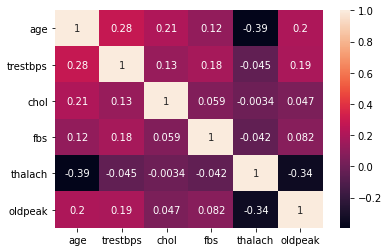

In [ ]:
from seaborn import heatmap

#concatenando a variável alvo no dataset
#dataframe_proc["num"]=num
numeric_data = dataframe_proc[feature_numericos]
cor_pearson = numeric_data.corr(method='pearson')
heatmap_num = heatmap(cor_pearson, annot=True)
heatmap_num

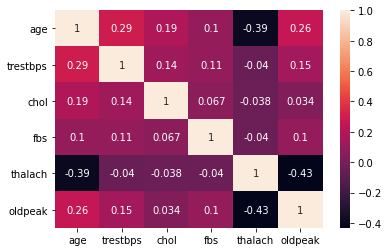

In [ ]:
cor_spearman = numeric_data.corr(method='spearman')
heatmap_num_s = heatmap(cor_spearman, annot=True)
heatmap_num_s

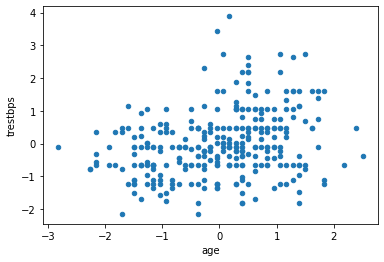

In [ ]:
numeric_data.plot.scatter(x='age',y='trestbps')

Primeiramenten tentamos observar a correlação entre as variáveis, nesse caso das variáveis númericas, já que a correlação não pode ser aplicada para variáveis categóricas. Observando o heatmap, acreditou-se que talvez uma das variáveis "age" ou "trestbps" pudessem ser excluídas por serem bem dependentes, mas observando o scatter plot de ambas foi possível perceber que não existe uma depedência tão grande assim. Dessa forma, buscamos outros métodos para encontrar as váriaveis mais relevantes.

Dessa forma, para encontrar as variáveis mais importante utilizaremos o método **Feature Importance**. Ele  fornece uma pontuação para cada variável do conjunto de dados, sendo que quanto maior a pontuação, mais importante ou relevante é aquela variável para a saída, havendo uma maior relação.
Esse método é uma classe embutida que vem com classificadores baseados em árvores de decisão, logo usaremos o Extra Tree Classifier para extrair os 10 principais recursos para o conjunto de dados.

[0.04946817 0.04085109 0.04349828 0.04534305 0.04941242 0.04995554
 0.01930556 0.02327866 0.09419018 0.01402044 0.02942259 0.01283566
 0.02011745 0.02199642 0.00143591 0.03402482 0.04783542 0.00849083
 0.03670571 0.03538226 0.10679865 0.02104741 0.01560886 0.0129338
 0.00566221 0.09998451 0.0603941 ]


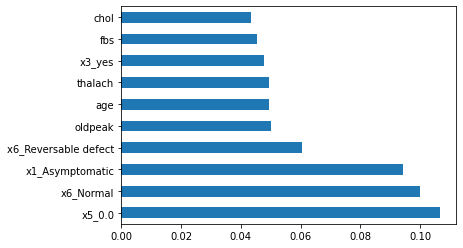

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(dataframe_proc,num)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=dataframe_proc.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
final_features = []
for index, _ in feat_importances.nlargest(10).iteritems():
  final_features.append(index)

print(final_features)

['x5_0.0', 'x6_Normal', 'x1_Asymptomatic', 'x6_Reversable defect', 'oldpeak', 'age', 'thalach', 'x3_yes', 'fbs', 'chol']




---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [ ]:
final_dataset = dataframe_proc[final_features]
final_dataset

,x5_0.0,x6_Normal,x1_Asymptomatic,x6_Reversable defect,oldpeak,age,thalach,x3_yes,fbs,chol
0,1.0,0.0,0.0,0.0,1.087338,0.948726,0.017197,0.0,2.135901,-0.264900
1,0.0,1.0,1.0,0.0,0.397182,1.392002,-1.821905,1.0,-0.228144,0.760415
2,0.0,0.0,1.0,1.0,1.346147,1.392002,-0.902354,1.0,-0.359813,-0.342283
3,1.0,1.0,0.0,0.0,2.122573,-1.932564,1.637359,0.0,-0.643220,0.063974
4,1.0,1.0,0.0,0.0,0.310912,-1.489288,0.980537,0.0,0.143187,-0.825922
...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,1.0,0.138373,-1.046013,-0.770990,0.0,0.431663,0.334813
299,0.0,0.0,1.0,1.0,2.036303,1.502821,-0.376896,0.0,2.010980,-1.038723
300,0.0,0.0,1.0,1.0,0.138373,0.283813,-1.515388,1.0,0.028716,-2.238149
301,0.0,1.0,0.0,0.0,-0.896862,0.283813,1.068113,0.0,-0.304774,-0.206864




---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

In [ ]:
from sklearn.decomposition import PCA

decomposition_pca = PCA(n_components=5, whiten='True')
decomposed_dataset = decomposition_pca.fit(final_dataset).transform(final_dataset)

print('Variança de cada elemento:', decomposition_pca.explained_variance_ratio_)
print('\nVariancia total do conjunto:', round(sum(list(decomposition_pca.explained_variance_ratio_))*100,2), '%')

#foi possivel reduzir o número total de váriaveis de 10 para 5 mantendo 85% da vâriancia total

Variança de cada elemento: [0.30333712 0.17465792 0.1545664  0.12813348 0.08922323]

Variancia total do conjunto: 84.99 %




---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia?

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# - Descrição:  Função que testa um modelo de classificação (SVM). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = svm.SVC()
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))


print('Utilizando os dados do modelo original após tratamento')
model_tester(final_dataset, num)
print('\nUtilizando os dados depois da redução do número de variáveis utilizando PCA')
model_tester(decomposed_dataset, num)

Utilizando os dados do modelo original após tratamento
Score do classificador: 83.48

Utilizando os dados depois da redução do número de variáveis utilizando PCA
Score do classificador: 78.20
